<a href="https://colab.research.google.com/github/Bhuvan588/Skin-Disease-Prediction/blob/main/Skin_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the dataset

In [1]:
!kaggle datasets download -d subirbiswas19/skin-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/subirbiswas19/skin-disease-dataset
License(s): CC0-1.0
 29% 5.00M/17.3M [00:00<00:00, 28.6MB/s]
100% 17.3M/17.3M [00:00<00:00, 70.8MB/s]


In [2]:
from zipfile import ZipFile

with ZipFile("skin-disease-dataset.zip", "r") as zip_ref:
  zip_ref.extractall()

Checking no of images

In [3]:
import os
train_dir  ="/content/skin-disease-datasaet/train_set"
total_train_images  =0

for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    num_images = len(os.listdir(category_dir))
    total_train_images += num_images

print("Total no of training images: ", total_train_images)

Total no of training images:  925


In [4]:
test_dir = "/content/skin-disease-datasaet/test_set"
total_test_images  =0

for category in os.listdir(test_dir):
  category_dir = os.path.join(test_dir , category)
  num_images = len(os.listdir(category_dir))
  total_test_images += num_images

print("Total no of test images: ", total_test_images)

Total no of test images:  234


Seeing some sample images

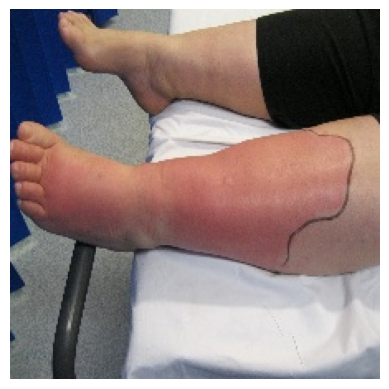

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_dir = "/content/skin-disease-datasaet/train_set/BA- cellulitis/BA- cellulitis (1).jpeg"
img = mpimg.imread(img_dir)
plt.imshow(img)
plt.axis("off")
plt.show()

In [12]:
print(img.shape)

(224, 224, 3)


Using Data Generators  - Helping in Data Augmentation

In [7]:
#DEFINING THE DATA GENERATOR
from keras.preprocessing.image import ImageDataGenerator
data_gen = ImageDataGenerator(
    rescale = 1./255,
)

In [8]:
#Defining the training set data generator

train_dir  ="/content/skin-disease-datasaet/train_set"

train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size =(150, 150),
    class_mode="categorical",
    batch_size = 32
)

Found 924 images belonging to 8 classes.


In [9]:
#Defining the test set generator

test_dir = "/content/skin-disease-datasaet/test_set"

test_generator = data_gen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    class_mode="categorical",
    batch_size = 32
)

Found 233 images belonging to 8 classes.


Building the CNN

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [33]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))



model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, (3,3), activation="relu", input_shape =(150, 150,3), padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(128, activation ="relu"))
model.add(Dropout(0.6))
model.add(Dense(8, activation="softmax"))

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_11 (Ba  (None, 150, 150, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 75, 75, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_12 (Ba  (None, 75, 75, 64)        256       
 tchNormalization)                                               
                                                      

Model Compiling

In [35]:
from keras.optimizers import Adam
model.compile(loss="categorical_crossentropy", optimizer ="adam", metrics=["accuracy"])

Model Training

In [36]:
history  = model.fit(train_generator, epochs = 25, batch_size = 15, validation_data = test_generator)

Epoch 1/25
29/29 [==============================] - 8s 96ms/step - loss: 4.6044 - accuracy: 0.1851 - val_loss: 2.2108 - val_accuracy: 0.0987
Epoch 2/25
29/29 [==============================] - 2s 53ms/step - loss: 2.6961 - accuracy: 0.2619 - val_loss: 2.1337 - val_accuracy: 0.1116
Epoch 3/25
29/29 [==============================] - 2s 52ms/step - loss: 2.4027 - accuracy: 0.2619 - val_loss: 2.2674 - val_accuracy: 0.1588
Epoch 4/25
29/29 [==============================] - 2s 54ms/step - loss: 2.1073 - accuracy: 0.2825 - val_loss: 2.1616 - val_accuracy: 0.1459
Epoch 5/25
29/29 [==============================] - 2s 54ms/step - loss: 1.8856 - accuracy: 0.3452 - val_loss: 2.3910 - val_accuracy: 0.0987
Epoch 6/25
29/29 [==============================] - 2s 84ms/step - loss: 1.8110 - accuracy: 0.3409 - val_loss: 2.8550 - val_accuracy: 0.0987
Epoch 7/25
29/29 [==============================] - 2s 52ms/step - loss: 1.6447 - accuracy: 0.4015 - val_loss: 2.3394 - val_accuracy: 0.0987
Epoch 8/25
29

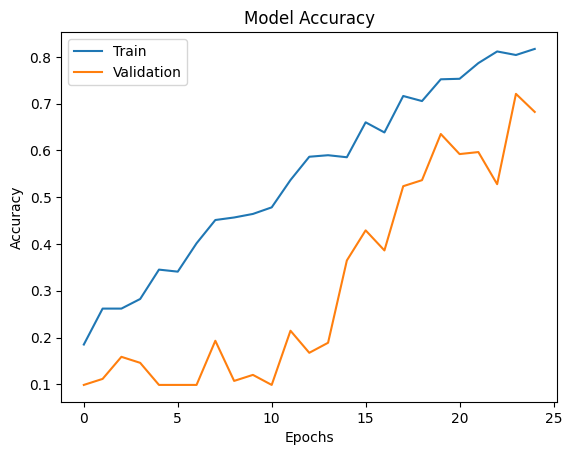

In [37]:
h = history

plt.plot(h.history["accuracy"])
plt.plot(h.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

In [39]:
model.save("skin_disease_model.keras")